# Project 4 - Predicting West Nile Virus

## Background 
Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across the city. Every week from Monday through Wednesday, these traps collect mosquitos, and the mosquitos are tested for the presence of West Nile virus before the end of the week. The test results include the number of mosquitos, the mosquitos species, and whether or not West Nile virus is present in the cohort. 

## Problem Statement
In view of the recent epidemic in Windy City of Chicago state affecting the state population, we aim to build a classifier model to make predictions on the possibility of West Nile Virus occurence on various locations of interest, which could be used to aid the deployment of pesticides in the fight for public health and safety.The model would be build using collected data related to mosquito population from the surveillance and control system setup by Deparment of Public Health. 

In addition, a cost-benefit analysis would be conducted on the cost benefits for the use of pesticides as a response in managing the epidemic. 

## Executive Summary

It is known that there is no vaccine available for West Nile Virus currently as reported by Centers for Disease Control and Prevention (CDC), but yet around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death. While there have been efforts in spraying pesticides in hope of killing the carriers of such virus, there has not been much success in eradicating this issue.

The purpose of this project is to present to CDC members a classifier model that could be used to predict the possible occurence of the virus at a specific location, together with a cost-benefit analysis on the use of pesticides to help decision makers if the use of spraying pesticides would be cost beneficial to the community. 


### Contents:
- [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning)
- [EDA & Feature Engineering](#EDA-and-Feature-Engineering)
- [Cleaning & Engineering Test Data](#Cleaning-and-Engineering-Test-Data)

## Data Dictionary

Spray data: GIS data of spraying efforts in 2011 and 2013

|Feature|Python data Type|Description|
|---|---|---|
|**Date**|*String*|Date of spray|
|**Time**|*String*|Time of spray|
|**Latitude**|*float*|Latitude of spray location|
|**Longitude**|*float*|Longitude of spray location|



Weather data: Weather data from 2007 to 2014

|Feature|Python data Type|Description|
|---|---|---|
|**Station**|*Integer*|Station ID|
|**Date**|*String*|Date of the weather data|
|**Tmax**|*Integer*|Max temperature in Fahrenheit|
|**Tmin**|*Integer*|Min temperature in Fahrenheit|
|**Tavg**|*Integer*|Average temperature in Fahrenheit|
|**Depart**|*Integer*|Temperature departure from normal|
|**DewPoint**|*Integer*|Average Dew Point in Fahrenheit|
|**WetBulb**|*Integer*|Average Wet Bulb temperature in Fahrenheit|
|**Heat**|*Integer*|Absolute temperature difference of average temperature (Tavg) from base 65 deg Fahrenheit for Tavg >=65 (season begins with July)|
|**Cool**|*Integer*|Absolute temperature difference of average temperature from base 65 deg Fahrenheit for Tavg <=65|
|**Sunrise**|*String*|Calculated Sunset timing in 24H format|
|**Sunset**|*String*|Calculated Sunrise timing in 24H format|
|**CodeSum**|*String*|Weather Type represented in codes|
|**Depth**|*Integer*|Snow Depth in inches|
|**Water1**|*Integer*|Amount of water equivalent from melted Snow|
|**SnowFall**|*Float*|SnowFall in precipitation|
|**PrecipTotal**|*Float*|Water precipitation|
|**StnPressure**|*Float*|Average Station Pressure|
|**SeaLevel**|*Float*|Average Sea Level Pressure|
|**ResultSpeed**|*Float*|Resultant Wind Speed|
|**ResultDir**|*Integer*|Resultant Wind Direction in Degrees|
|**AvgSpeed**|*Float*|Average Wind Speed|
              
Training data: The training set consists of data from 2007, 2009, 2011, and 2013.

|Feature|Python data Type|Description|
|---|---|---|
|**Date**|*String*|Date which the WNV test is performed|
|**Address**|*String*|Approximate address of the location of trap. |
|**Species**|*String*|Named species of mosquitoes|
|**Block**|*String*|Block number of address for the location of the trap|
|**Street**|*String*|Street name|
|**Trap**|*String*|Trap ID|
|**AddressNumberAndStreet**|*String*|Approximate address returned from GeoCoder|
|**Latitude**|*Float*|Latitude returned from Geocoder|
|**Longitude**|*Float*|Longitude returned from Geocoder|
|**AddressAccuracy**|*Integer*|Accuracy returned from GeoCoder|
|**NumMosquitos**|*Integer*|Number of mosquitoes caught in this trap|
|**WnvPresent**|*Integer*|Whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 
|

Testing data: Dataset to predict the test results for 2008, 2010, 2012, and 2014.

|Feature|Python data Type|Description|
|---|---|---|
|**Id**|*Integer*|ID of the record|
|**Date**|*String*|Date which the WNV test is performed|
|**Address**|*String*|Approximate address of the location of trap. |
|**Species**|*String*|Species of mosquitoes|
|**Block**|*String*|Block number of address for the location of the trap|
|**Street**|*String*|Street name|
|**Trap**|*String*|Trap ID|
|**AddressNumberAndStreet**|*String*|Approximate address returned from GeoCoder|
|**Latitude**|*Float*|Latitude returned from Geocoder|
|**Longitude**|*Float*|Longitude returned from Geocoder|
|**AddressAccuracy**|*Integer*|Accuracy returned from GeoCoder|

In [356]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

## Data Cleaning

The data consists of 4 separate files - `train.csv`, `test.csv`, `spray.csv` and `weather.csv`. We will clean these datasets individually before proceeding.

In [357]:
train = pd.read_csv('../assets/train.csv')
spray = pd.read_csv('../assets/spray.csv')
weather = pd.read_csv('../assets/weather.csv')
test = pd.read_csv('../assets/test.csv')

### Spray Data

The spray dataset consists of GIS data of spraying efforts in 2011 and 2013.

In [358]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [359]:
spray.shape

(14835, 4)

In [360]:
# Checking for duplicates
spray.duplicated().sum()

541

In [361]:
# Drop duplicates
spray.drop_duplicates(inplace=True)

In [362]:
# Checking for null values
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

#### Time Column

This dataset has an additional column indicating the exact time the spraying was conducted. However, in our main train & test datasets, observations are only by date. Thus, we will be dropping this column. Conveniently, this removes all the null values in this dataset as well.

In [363]:
# Drop Time column
spray.drop(columns='Time', inplace=True)

#### Fixing Datatypes

In [364]:
spray.dtypes

Date          object
Latitude     float64
Longitude    float64
dtype: object

In [365]:
# Convert date to datetime object
spray["Date"] = pd.to_datetime(spray["Date"], format = "%Y-%m-%d")

In [366]:
# Convert column names to lowercase 
spray.columns = [col.lower() for col in spray.columns]
spray.head()

,date,latitude,longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


### Weather Data

The weather dataset consists of various meteorological observations from 2 different weather stations, from 2007 to 2014.

In [367]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [368]:
weather.shape

(2944, 22)

In [369]:
# Check for duplicates
weather.duplicated().any()

False

In [370]:
# Check for null values
weather.isnull().any().any()

False

In [371]:
# Check for missing or trace values
weather.isin(['M', '-', '  T']).sum().sort_values(ascending=False)

Water1         2944
SnowFall       1484
Sunset         1472
Depth          1472
Depart         1472
Sunrise        1472
PrecipTotal     320
Tavg             11
Heat             11
Cool             11
SeaLevel          9
StnPressure       4
WetBulb           4
AvgSpeed          3
CodeSum           0
Date              0
DewPoint          0
Tmin              0
Tmax              0
ResultSpeed       0
ResultDir         0
Station           0
dtype: int64

#### Missing Value Imputation

This dataset has many missing values. Upon studying the dataset, many of these are due to certain observations only being recorded in one weather station and not the other. We will explore these columns and impute accordingly.

In [372]:
weather.groupby('Station')['Water1'].value_counts()

Station  Water1
1        M         1472
2        M         1472
Name: Water1, dtype: int64

In [373]:
weather.groupby('Station')['Depth'].value_counts()

Station  Depth
1        0        1472
2        M        1472
Name: Depth, dtype: int64

In [374]:
weather.groupby('Station')['SnowFall'].value_counts()

Station  SnowFall
1        0.0         1459
           T           12
         0.1            1
2        M           1472
Name: SnowFall, dtype: int64

Drop `Water1` as all values are missing. Drop `Depth` and `SnowFall` as well because even the recorded values are mostly 0, thus they do not provide us with meaningful information.

In [375]:
weather.drop(columns=['Water1', 'Depth', 'SnowFall'], inplace=True)

For remaining columns with missing values, can impute based on values from other station or via interpolation.

In [376]:
# Impute missing sunrise & sunset values with observations from other station
def impute_sun(row):
    if row['Sunrise'] == '-':
        row['Sunrise'] = weather.loc[
            (weather['Date'] == row['Date']) & 
            (weather['Station'] == 1), 
            'Sunrise'
        ].values[0]
        row['Sunset'] = weather.loc[
            (weather['Date'] == row['Date']) & 
            (weather['Station'] == 1), 
            'Sunset'
        ].values[0]
    return row

In [377]:
weather = weather.apply(impute_sun, axis=1)

In [378]:
# Impute Tavg with mean of Tmax & Tmin
def impute_tavg(row):
    if row['Tavg'] == 'M':
        row['Tavg'] = round((row['Tmax'] + row['Tmin']) / 2)
    return row

In [379]:
weather = weather.apply(impute_tavg, axis=1)

In [380]:
# Impute station 2 with departure from station 1's 30 year normal
def impute_depart(row):
    if row['Station'] == 2:
        # Difference between avg temp of two stations
        diff = int(row['Tavg']) - int(weather.loc[
            (weather['Date'] == row['Date']) & 
            (weather['Station'] == 1), 
            'Tavg'
        ])
        # Impute with station 1's readings plus difference
        row['Depart'] = int(weather.loc[
            (weather['Date'] == row['Date']) & 
            (weather['Station'] == 1), 
            'Depart'
        ]) + diff
    return row

In [381]:
weather = weather.apply(impute_depart, axis=1)

In [382]:
# Impute Heat & Cool with departure from base 65 degree temp
def impute_heat_cool(row):
    if row['Heat'] == 'M' or row['Cool'] == 'M':
        diff = 65 - row['Tavg']
        if diff < 0: 
            row['Heat'] = 0
            row['Cool'] = diff
        elif diff > 0:
            row['Heat'] = diff
            row['Cool'] = 0
        else:
            row['Heat'] = row['Cool'] = 0
    return row

In [383]:
weather = weather.apply(impute_heat_cool, axis=1)

In [384]:
# Impute StnPressure by interpolating from previous & next day values
for index, row in weather.loc[weather['StnPressure'].isin(['M'])].iterrows():
    inter = (float(weather.iloc[(index - 2)]['StnPressure']) + \
             float(weather.iloc[(index + 2)]['StnPressure'])) / 2
    weather.at[index, 'StnPressure'] = round(inter, 2)

In [385]:
# Impute StnPressure by interpolating from previous & next day values
for index, row in weather.loc[weather['SeaLevel'].isin(['M'])].iterrows():
    inter = (float(weather.iloc[(index - 2)]['SeaLevel']) + \
             float(weather.iloc[(index + 2)]['SeaLevel'])) / 2
    weather.at[index, 'SeaLevel'] = round(inter, 2)

In [386]:
# Change trace values for PrecipTotal to 0.01
weather['PrecipTotal'] = weather['PrecipTotal'].map(lambda x: 0.01 if x == '  T' else x)

In [387]:
# Impute remaining missing values with observations from other station
def impute_remain(row):
    if row['WetBulb'] == 'M':
        if row['Station'] == 1:
            row['WetBulb'] = weather.loc[
                (weather['Date'] == row['Date']) & 
                (weather['Station'] == 2), 
                'WetBulb'
            ].values[0]
        else:
            row['WetBulb'] = weather.loc[
                (weather['Date'] == row['Date']) & 
                (weather['Station'] == 1), 
                'WetBulb'
            ].values[0]
        
    if row['AvgSpeed'] == 'M':
        row['AvgSpeed'] = weather.loc[
            (weather['Date'] == row['Date']) & 
            (weather['Station'] == 1), 
            'AvgSpeed'
        ].values[0]
        
    if row['PrecipTotal'] == 'M':
        row['PrecipTotal'] = weather.loc[
            (weather['Date'] == row['Date']) & 
            (weather['Station'] == 1), 
            'PrecipTotal'
        ].values[0]
    
    return row

In [388]:
weather = weather.apply(impute_remain, axis=1)

In [389]:
# Confirm all values are imputed
weather.isin(['M', '-', '  T']).any().any()

False

#### CodeSum

The `CodeSum` column has some inconsistencies - some of the codes are joined together. Will need to separate them and remove duplicate codes within the same observation.

In [390]:
# Create set of codes for each observation
weather['CodeSum'] = weather['CodeSum'].map(lambda x: set(x.split()))

In [391]:
# Create function to split conjoined codes into two separate codes
def code_split(row):
    new_set = set()
    for code in row:
        if len(code) > 3:
            new_set.add(code[:2])
            new_set.add(code[2:])
        else:
            new_set.add(code)
    return new_set

In [392]:
weather['CodeSum'] = weather['CodeSum'].map(code_split)

#### Fixing Datatypes

In [393]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [394]:
# Convert sunrise & sunset into seconds from start of day
def get_sec(time_str):
    hours = time_str//100 # Get the hour value
    mins = time_str % 100 # Get the minute value
    total_seconds = hours * 3600 + mins * 60
    return total_seconds

In [395]:
weather['Sunrise'] = weather['Sunrise'].apply(pd.to_numeric).apply(get_sec)
weather['Sunset'] = weather['Sunset'].apply(pd.to_numeric).apply(get_sec)

In [396]:
# Convert object columns to numeric values
fix_cols = weather.columns[weather.dtypes.eq('object')].drop(['Date', 'CodeSum'])
weather[fix_cols] = weather[fix_cols].apply(pd.to_numeric)

In [397]:
# Convert Date column to datetime format
weather['Date'] = pd.to_datetime(weather['Date'], format="%Y-%m-%d")

#### Combining by Station

The dataset is still split into station 1 & 2 for the same dates. We will combine them into 1 reading per date, averaging values where possible, so that we can easily merge this dataset with the training & test sets later on.

In [398]:
# Replace values in station 1 observations with combined values
for index, row in weather.iterrows():
    if index % 2 == 0:
        # Take union of sets for CodeSum
        codes = weather.iloc[index]['CodeSum'].union(weather.iloc[index + 1]['CodeSum'])
        weather.at[index, 'CodeSum'] = codes
        
        # Take average of numerical features of both stations
        for col in weather.columns.drop(['Station', 'Date', 'CodeSum']):
            avg = round((weather.iloc[index][col] + weather.iloc[index + 1][col]) / 2, 2)
            weather.at[index, col] = avg

# Drop observations for station 2
weather.drop(weather.loc[weather['Station'] == 2].index, inplace=True)

# Drop station column & reset index
weather.drop(columns='Station', inplace=True)
weather.reset_index(drop=True, inplace=True)

In [399]:
# Lowercase columns
weather.columns = [col.lower() for col in weather.columns]
weather.head()

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2007-05-01,83,51,67,14,51,56,0,2,17280,67740,{},0.00,29.14,29.82,2.20,26,9.40
1,2007-05-02,59,42,51,-2,42,47,13,0,17220,67800,"{HZ, BR}",0.00,29.41,30.08,13.15,3,13.40
2,2007-05-03,66,47,57,3,40,49,8,0,17160,67860,{HZ},0.00,29.42,30.12,12.30,6,12.55
3,2007-05-04,72,50,61,7,41,50,4,0,17040,67920,{RA},0.00,29.34,30.04,10.25,7,10.60
4,2007-05-05,66,53,60,5,38,49,5,0,16980,67980,{},0.01,29.43,30.10,11.45,7,11.75


### Train Data

The train dataset consists of mosquito trap data from 2007, 2009, 2011 and 2013. Each observation indicates the number of mosquitos (capped at 50 per observation) and the presence of WNV.

In [400]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [401]:
train.shape

(10506, 12)

In [402]:
# Check for duplicates
train.duplicated().sum()

813

The train dataset seems to have many duplicate rows. However, this is due to the structure of the dataset (capped at 50 mosquitos per observation) as mentioned earlier. We will explore this issue later during EDA & feature engineering.

In [403]:
# Check for null values
train.isnull().any().any()

False

#### Fixing Datatypes

In [404]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [405]:
# Convert date to datetime object
train["Date"] = pd.to_datetime(train["Date"], format = "%Y-%m-%d")

In [406]:
# Convert column names to lowercase 
train.columns = [col.lower() for col in train.columns]
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


## EDA & Feature Engineering

We can try and visualise some aspects of the cleaned data to gether some insights, which may help in our analysis & evaluation later on. We will also be doing some feature engineering where relevant.

### Spray Data

#### Spray Dates

On what dates were spraying carried out?

In [407]:
spray['date'].dt.date.unique()

array([datetime.date(2011, 8, 29), datetime.date(2011, 9, 7),
       datetime.date(2013, 7, 17), datetime.date(2013, 7, 25),
       datetime.date(2013, 8, 8), datetime.date(2013, 8, 15),
       datetime.date(2013, 8, 16), datetime.date(2013, 8, 22),
       datetime.date(2013, 8, 29), datetime.date(2013, 9, 5)],
      dtype=object)

We see that our spray data does not look complete. We can explore this visually with the map view.

#### Areas sprayed by year

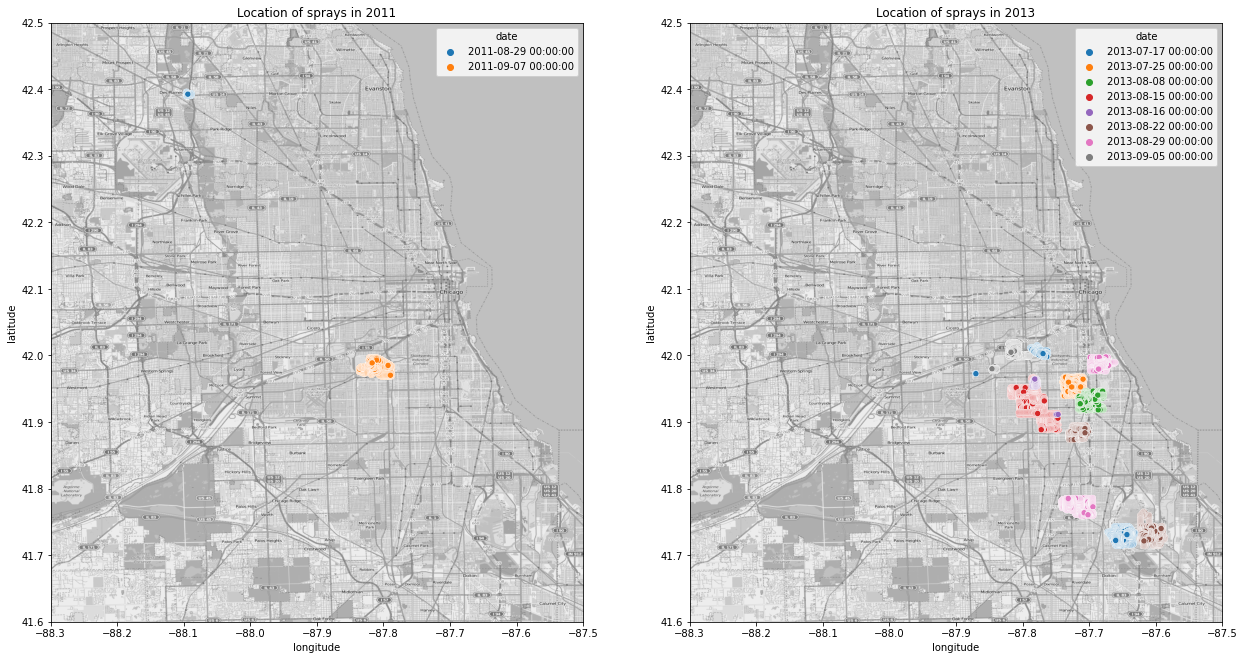

In [408]:
# Split the dataframe based on year
spray_df_2013 = spray[spray['date'].dt.year == 2013]
spray_df_2011 = spray[spray['date'].dt.year == 2011]

mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

origin = [41.6, -88.3]              # lat/long of origin (lower left corner)
upperRight = [42.5, -87.5]          # lat/long of upper right corner
#rescales the image data to the GPS co-ordinates of the bounding box for Chicago defined by extent arguments

fig, ax = plt.subplots(1, 2, figsize = (21,15))
ax[0].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
ax[1].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = "longitude", y = "latitude", data= spray_df_2011, hue = 'date', ax = ax[0]);
sns.scatterplot(x = "longitude", y = "latitude", data= spray_df_2013, hue = 'date', ax = ax[1]);
ax[0].set_title("Location of sprays in 2011")
ax[1].set_title("Location of sprays in 2013");

We can see that the area sprayed in 2011 has some overlaps with the areas that spraying was observed to be done in 2013, with the exception of a small cluster area north of Chicago.

We know from external research that Chicago suffered its first and most severe WNV epidemic in 2002, and in 2004 the Chicago Department for Public Health (CDPH) established a surveillance and control program, which includes [annual spraying](https://datasmart.ash.harvard.edu/news/article/predictive-analytics-guides-west-nile-virus-control-efforts-in-chicago-1152).

This means we should also have spray data available from 2007 to 2013, equivalent to the years in our train dataset. However this seems to be missing from the spray dataset. Further, for 2011 we only have 2 observations of spraying being carried out. 

This would imply that spray may not be a useful feature for our modelling. Thus, we will not be incorporating any features from this dataset in our final model. However, we may find some use in this dataset when evaluating the efficacy of spraying later on.

### Weather Data

#### Total Sunlight Time

Besides sunrise & sunset, we can create another feature indicating the total sunlight time in that particular day.

In [409]:
weather['total_sunlight'] = weather['sunset'] - weather['sunrise']

#### CodeSum

In order for our model to be able to read the `codesum` column, we need to convert it to numerical features. Some observations have multiple codes for the same date. We will 'pseudo-one-hot-encode' this feature by creating a new column for each code and indicating if that code appeared on any particular date or not. 

In [410]:
# Convert back to string
weather['codesum'] = weather['codesum'].astype(str)

# Empty sets
weather['codesum'].replace('set()','', inplace=True)

# Get all codesums
allcode = list(weather['codesum'].unique())

# use regex to remove all non-words, then add into a string
allc = ''
for i in allcode:
    allc = allc+(re.sub("[^a-zA-Z+]", " ", str(i)))

# Set to get unique and create columns 
allcodes = list(set(allc.split()))
for code in allcodes:
    weather[code] = [1 if code in ele else 0 for ele in weather["codesum"]]

In [411]:
# Re-run 'FG' because of duplicates of FG-FG+
weather['FG'] = [1 if 'FG' in ele.replace('FG+','') else 0 for ele in weather["codesum"]]

# Drop original codesum column
weather.drop(columns='codesum', inplace=True)

#### Relative Humidity

[Studies have shown](https://www.cabdirect.org/cabdirect/abstract/19302901857) that relative humidity has a noticeable effect on biting stimulus, lifespan & aestivation period of mosquitoes. We will be creating a new feature reflecting the [relative humidity](https://www.wikihow.com/Calculate-Humidity) of each observation using the `dewpoint` and `tavg` columns.

In [412]:
# Defining variables
t = weather['tavg'].map(lambda x: (x-32)*(5/9))
td = weather['dewpoint'].map(lambda x: (x-32)*(5/9))
es = 6.11*(10*((7.5*t)/(237.3+t)))
e = 6.11*(10*((7.5*td)/(237.3+td)))

weather['rel_humid'] = (e/es)*100

#### Time Lagged Temperature

According to a [study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/#:~:text=The%20effects%20of%20weather%20fluctuations,infection%20%5B43%2C81%5D), increases in mean weekly temperature were associated with significantly higher incidences of reported WNF infection. In order to include this potential relationship in our prediction model, we will create a new column indicating the difference in mean temperature from the week before.

In [413]:
weather['tavg_change'] = weather['tavg'].diff(7)

#### Rolling Temporal Features

The typical incubation period for _Culex_ species mosquitoes is [7-10 days](https://www.cdc.gov/mosquitoes/about/life-cycles/culex.html). However, the length of each stage has been reported to be affected by certain external factors, and the life cycle may be extended to [a month long](https://www.mosquito.org/page/lifecycle). However, our data only describes external factors on the day of the observation itself, which is not very useful in certain cases.

In order to capture any relationships related to the mosquitoes' incubation period, we will create new columns monitoring the rolling average for some features across 3 periods - 5, 14 & 28 days.

1. `tavg`
- External temperature has been known to be one of the most important environmental features in affecting mosquitoes' lifespans & breeding characteristics   
2. `rel_humid`
- As discussed above, relative humidity has a noticeable effect on certain characteristics of mosquitoes.
3. `avgspeed`
- Humans & mosquitoes are not the only hosts for the WNV. [Birds](https://academic.oup.com/jme/article/56/6/1467/5572129) have also been shown to be one of the main carriers of the virus, so it is worth exploring features that may affect bird populations in the area, such as average wind speed.
4. `preciptotal`
- Precipitation has been shown to have both [positive](https://www.sciencedirect.com/science/article/abs/pii/S0022519317301431) and [negative](https://pubmed.ncbi.nlm.nih.gov/18283939/) effects on mosquito populations, depending on rainfall intensity. This non-linear relationship may be explored further across time periods.

In [414]:
for feat in ['tavg', 'rel_humid', 'avgspeed', 'preciptotal']:
    for days in [5, 14, 28]:
        weather[(feat + '_lag' + str(days))] = weather[feat].rolling(days).mean()

In [415]:
weather.head()

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,...,tavg_lag28,rel_humid_lag5,rel_humid_lag14,rel_humid_lag28,avgspeed_lag5,avgspeed_lag14,avgspeed_lag28,preciptotal_lag5,preciptotal_lag14,preciptotal_lag28
0,2007-05-01,83,51,67,14,51,56,0,2,17280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-05-02,59,42,51,-2,42,47,13,0,17220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-05-03,66,47,57,3,40,49,8,0,17160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-05-04,72,50,61,7,41,50,4,0,17040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-05-05,66,53,60,5,38,49,5,0,16980,...,NaN,39.634503,NaN,NaN,11.54,NaN,NaN,0.002,NaN,NaN


### Train Data

#### Checking for Imbalanced Classes

In [416]:
#checking for imbalanced classes
train['wnvpresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

It looks like the classes are quite imbalanced. The possible solutions would be to split the data into a stratified fashion during train test split or to SMOTE the imbalanced class.  We will deal with the class imbalance when we fit our models later.

#### Traps

This dataset also has a feature indicating the trap number that the observation was taken from. We explore traps because they are proxies for locations, and they also contain relevant information on mosquitos species and number of mosquitos trapped over the years.

In [417]:
# Which traps have recorded the highest number of mosquitos?
train.groupby(['trap', 'street'])['nummosquitos'].sum().sort_values(ascending=False)

trap  street             
T115   S DOTY AVE            21668
T900   W OHARE AIRPORT       15386
T138   S STONY ISLAND AVE     9936
T002   N OAK PARK AVE         3710
T128   E 105TH ST             3315
                             ...  
T072   S KEDZIE AVE             19
T237   W 85TH ST                18
T078   S RACINE AVE             17
T149   W GRANVILLE AVE          15
T040   S HAMLIN AVE              6
Name: nummosquitos, Length: 138, dtype: int64

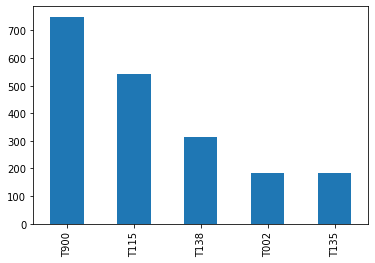

In [418]:
# Which traps have been most sampled?  
train['trap'].value_counts(ascending=False).head().plot(kind='bar');

Thus far, we see that S Doty Ave and W Ohare Airport seem to be the 2 most frequently sampled locations, and traps in these 2 locations (T115 and T900) have captured the highest number of mosquitos over the years.

In [419]:
train["lat_lon"] = train["latitude"].astype(str) + ", " + train["longitude"].astype(str)

print(f'No of unique traps in Train dataset: {train["trap"].nunique()}')
print(f'No of unique lat-lon coordinates in Train dataset: {train["lat_lon"].nunique()}')
print(f'No of unique traps in Test dataset: {test["Trap"].nunique()}')

No of unique traps in Train dataset: 136
No of unique lat-lon coordinates in Train dataset: 138
No of unique traps in Test dataset: 149


However, there are a few issues with this feature as illustrated above.

1. The number of unique traps and coordinates do not match up, meaning that the same trap might have changed locations across different observations
2. The number of unique traps in the test dataset is greater than the train dataset. Since trap numbers are nominal, this means that there would be certain trap numbers in the test dataset that we are unable to assign importance to during the modelling process, which would be inaccurate since these traps are still within the same study area.

Therefore, we decided to drop the `trap` column from our model.

In [420]:
# Drop trap column
train.drop(columns='trap', inplace=True)

#### Features Describing Location

The train dataset has multiple other features describing the location of the observation, including `address`, `block`, `street`, `addressnumberandstreet` and `addressaccuracy`. However, since we also have `latitude` and `longitude`, these features are redundant and do not add anything more meaningful to our model. Thus, we will drop them.

In [421]:
# Drop other features describing location
train.drop(["address", "block", "street", "addressnumberandstreet", "addressaccuracy"],
              axis = 1,
              inplace = True)

#### Mosquito Species

In [422]:
# How many species of mosquitos are in the observations?
train['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

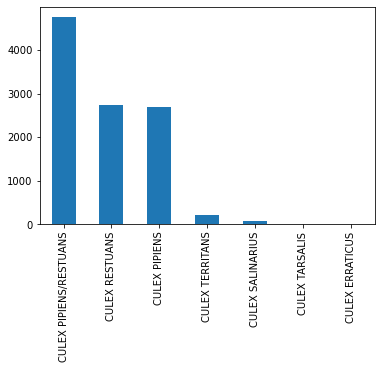

In [423]:
# How many mosquitos of each species are in the dataset?
train['species'].value_counts(ascending=False).plot(kind='bar');

We can see that there are 7 species of mosquitos observed in the dataset. Out of which 3 species are observed more frequently than the others. Namely: Culex Pipiens/Restuans, Culex Restuans and Culex Pipiens. 

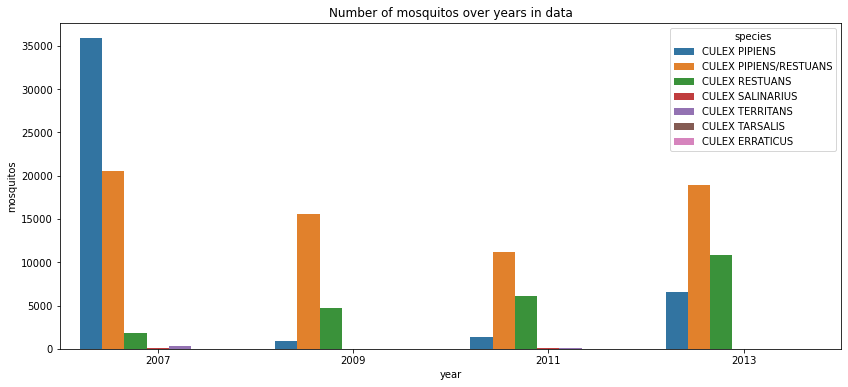

In [424]:
# Mosquito population over the years
# Charting mosquitos by year
train['year'] = (train['date'].dt.strftime('%Y')).astype(int) #create year column in dataset

mosq_by_yr = train.groupby(['year', 'species'], as_index=False).sum().reindex()

plt.figure(figsize = (14,6))
plt.title('Number of mosquitos over years in data')
sns.barplot(x='year', y='nummosquitos', hue='species', data=mosq_by_yr)
plt.xlabel('year')
plt.ylabel('mosquitos'); 

Mosquito population was highest in the year 2007 with the species Culex Pipiens having the highest population. However, the overall mosquito population decreased in 2009 and 2011, and Culex Pipens/Restuans became the species with the highest population. 

In 2013, the population of mosquitos seems to have started increasing again.

In [425]:
# Which species of mosquitos carry the West Nile Virus?
train.loc[train['wnvpresent']==1]['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS'],
      dtype=object)

In [426]:
# Proportion of species that carry the virus?
train.loc[train['wnvpresent']==1]['species'].value_counts(ascending=False)

CULEX PIPIENS/RESTUANS    262
CULEX PIPIENS             240
CULEX RESTUANS             49
Name: species, dtype: int64

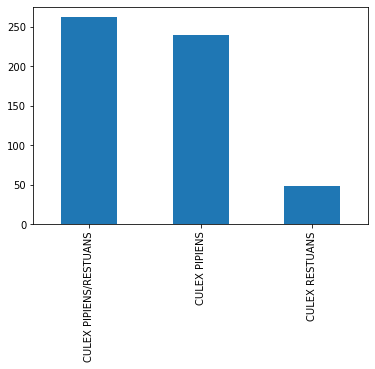

In [427]:
train.loc[train['wnvpresent']==1]['species'].value_counts(ascending=False).plot(kind="bar");

We can see that there are 3 species which carry the West Nile Virus, which coincidentally also have the highest number of observations compared to other mosquito species. For the purposes of modelling, we will be transforming species into an ordinal feature, based on proportion. 

Culex Pipiens/Restuans and Culex Pipiens will take the value of 2 as they seem to have similar proportions in terms of carrying the west nile virus. Culex Restuans will take the value of 1, and other mosquito species will take the value of 0.

In [428]:
train['species_ord'] = train['species'].map(
    {'CULEX PIPIENS/RESTUANS': 2, 'CULEX PIPIENS': 2, 'CULEX RESTUANS': 1})

# 0 for species other than the virus carriers
train['species_ord'].fillna(0, inplace=True)

In [429]:
train.head()

,date,species,latitude,longitude,nummosquitos,wnvpresent,lat_lon,year,species_ord
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0,"41.95469, -87.800991",2007,2.0
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,1,0,"41.95469, -87.800991",2007,1.0
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,1,0,"41.994991, -87.769279",2007,1.0
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,1,0,"41.974089, -87.824812",2007,2.0
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,4,0,"41.974089, -87.824812",2007,1.0


#### Combining Mosquito Counts

We know that the dataset is organized such that the number of mosquitos captured is capped at 50 per record. Beyond 50, another row will be created for data collected on the same day. We will therefore explore combining the dataset rows together.

In [432]:
# Checking for duplicates on same date, location & species
train.loc[train.duplicated(subset=['date', 'lat_lon', 'species'], keep=False)]

,date,species,latitude,longitude,nummosquitos,wnvpresent,lat_lon,year,species_ord
98,2007-06-26,CULEX PIPIENS/RESTUANS,41.688324,-87.676709,1,0,"41.688324, -87.676709",2007,2.0
99,2007-06-26,CULEX PIPIENS/RESTUANS,41.688324,-87.676709,1,0,"41.688324, -87.676709",2007,2.0
280,2007-07-11,CULEX RESTUANS,41.974089,-87.824812,1,0,"41.974089, -87.824812",2007,1.0
281,2007-07-11,CULEX RESTUANS,41.974089,-87.824812,2,0,"41.974089, -87.824812",2007,1.0
293,2007-07-11,CULEX PIPIENS/RESTUANS,41.688324,-87.676709,50,0,"41.688324, -87.676709",2007,2.0
...,...,...,...,...,...,...,...,...,...
10485,2013-09-26,CULEX PIPIENS/RESTUANS,41.974689,-87.890615,4,0,"41.974689, -87.890615",2013,2.0
10486,2013-09-26,CULEX PIPIENS,41.974689,-87.890615,16,0,"41.974689, -87.890615",2013,2.0
10487,2013-09-26,CULEX PIPIENS,41.974689,-87.890615,9,0,"41.974689, -87.890615",2013,2.0
10488,2013-09-26,CULEX PIPIENS,41.974689,-87.890615,11,0,"41.974689, -87.890615",2013,2.0


As seen above, there are many observations which are duplicates of the same date-trap-species subset. For the purposes of modelling, we will combine these rows together.

In [433]:
# Prevent issue where one unique trap, species and date has 2 rows if wnv = 1 in one observation 
# and 0 in another
train = train.groupby([col for col in train.columns if col not in ['nummosquitos',\
                                    'wnvpresent']], as_index=False).sum().reindex()


# Re-binarize wnvpresent column as it now has values more than 1
train['wnvpresent'] = train['wnvpresent'].map(lambda x: 1 if x > 0 else 0)

In [434]:
train

,date,species,latitude,longitude,lat_lon,year,species_ord,nummosquitos,wnvpresent
0,2007-05-29,CULEX PIPIENS,41.731922,-87.677512,"41.731922, -87.677512",2007,2.0,1,0
1,2007-05-29,CULEX PIPIENS/RESTUANS,41.688324,-87.676709,"41.688324, -87.676709",2007,2.0,1,0
2,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,"41.867108, -87.654224",2007,2.0,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.891126,-87.611560,"41.891126, -87.61156",2007,2.0,1,0
4,2007-05-29,CULEX PIPIENS/RESTUANS,41.919343,-87.694259,"41.919343, -87.694259",2007,2.0,1,0
...,...,...,...,...,...,...,...,...,...
8470,2013-09-26,CULEX RESTUANS,41.750498,-87.605294,"41.750498, -87.605294",2013,1.0,1,0
8471,2013-09-26,CULEX RESTUANS,41.803423,-87.642984,"41.803423, -87.642984",2013,1.0,2,0
8472,2013-09-26,CULEX RESTUANS,41.867108,-87.654224,"41.867108, -87.654224",2013,1.0,7,0
8473,2013-09-26,CULEX RESTUANS,41.963976,-87.691810,"41.963976, -87.69181",2013,1.0,8,0


In [435]:
weather

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,...,tavg_lag28,rel_humid_lag5,rel_humid_lag14,rel_humid_lag28,avgspeed_lag5,avgspeed_lag14,avgspeed_lag28,preciptotal_lag5,preciptotal_lag14,preciptotal_lag28
0,2007-05-01,83,51,67,14,51,56,0,2,17280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-05-02,59,42,51,-2,42,47,13,0,17220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-05-03,66,47,57,3,40,49,8,0,17160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-05-04,72,50,61,7,41,50,4,0,17040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-05-05,66,53,60,5,38,49,5,0,16980,...,NaN,39.634503,NaN,NaN,11.54,NaN,NaN,0.002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,78,52,65,17,51,58,0,1,22680,...,54.428571,37.601956,55.170580,50.068099,8.68,9.046429,9.360714,0.002,0.073571,0.108929
1468,2014-10-28,67,46,57,10,39,47,8,0,22740,...,54.535714,34.340974,50.591575,48.476990,10.08,9.453571,9.535714,0.006,0.009286,0.109286
1469,2014-10-29,49,38,44,-3,33,41,21,0,22800,...,53.928571,25.021149,44.679555,46.510728,10.81,9.428571,9.533929,0.006,0.005000,0.109286
1470,2014-10-30,52,34,43,-2,34,41,21,0,22920,...,53.000000,23.130797,40.108822,44.233602,9.88,9.292857,9.466071,0.006,0.004286,0.090714


### Combined Dataset

We will be combining our train & weather datasets from here onwards.

In [438]:
comb = pd.merge(train, weather, on='date').drop(columns=['lat_lon', 'species', 'year'])

#### Week of Year

In [440]:
# Create week-of-year column
comb['weekofyear'] = comb.date.dt.isocalendar().week

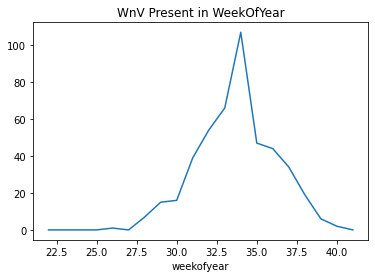

In [444]:
# Plot WNV presence against week-of-year
comb.groupby('weekofyear')['wnvpresent'].sum().plot()
plt.title('WnV Present in WeekOfYear');

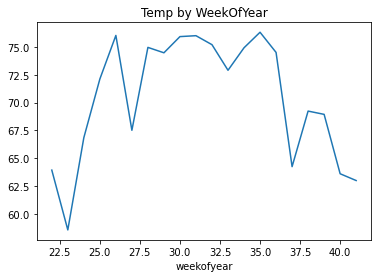

In [446]:
# Plot average temperature against week-of-year
comb.groupby('weekofyear')['tavg'].mean().plot()
plt.title('Temp by WeekOfYear');

Throughout the entire training dataset, we observe that occurences of WNV peaks around week 33-34 (around August). In Chicago, August is in its summer season, so weather is very warm. Temperature usually peaks around July (above we have a plot of mean temperature by WeekofYear). This coincides with our subject background research as well. 

- Culex mosquitos usually require around 2 weeks to grow from larvae to an adult
- After getting infected, the incubation period lasts from 2 days to 15 days

As we can see from the temperature curve, the weather starts getting warm after week 25. Then it slowly rises and peaks around week 28 to 30, and it starts to cool down gradually.

Assuming a 2 to 4 weeks infection kickstart period, we also start to see cases slowly rising at week 28. There will be a very steep rise in cases up till the peak around week 33/34. Just as temperature drops after week 30, the presence of WNV in the traps tend to fall sharply at week 35 onwards.

#### Effectiveness of Spraying

We will use the spray dataset and our combined dataset to explore how effective spraying has been to curb the mosquito population and in turn the west nile virus.

In [447]:
spray_2011 = spray['date'].unique()[:2]
mosq_2011 = comb[comb['date'].dt.year==2011].groupby('date')['nummosquitos'].sum()
wnv_2011 = comb[comb['date'].dt.year==2011].groupby('date')['wnvpresent'].sum()

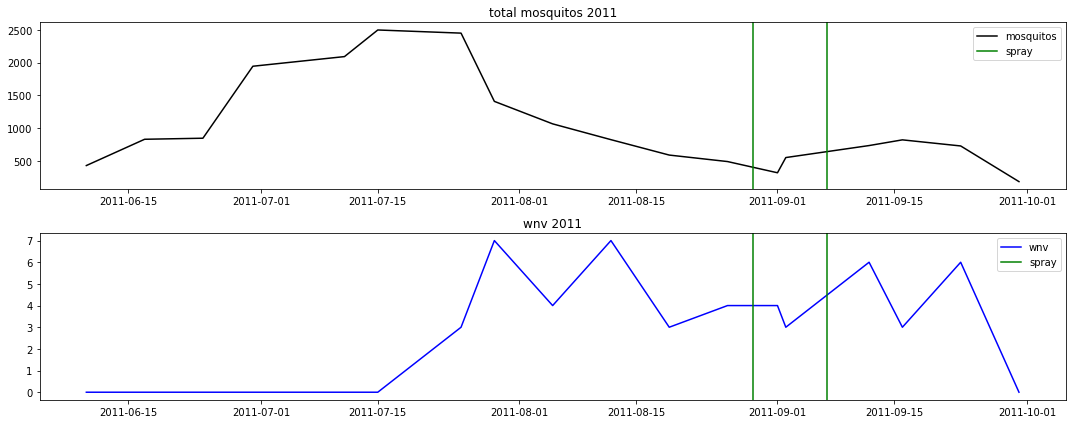

In [448]:
fig, ax = plt.subplots(nrows=2, figsize=(15,6))
ax[0].plot(mosq_2011.index, mosq_2011.values, color='black')
for date in spray_2011:
    ax[0].axvline(x=date, color='green', ls='-')
ax[0].set_title('total mosquitos 2011')
ax[0].legend(['mosquitos','spray'], loc='upper right')


ax[1].plot(wnv_2011.index,wnv_2011.values,color='blue')
for date in spray_2011:
    ax[1].axvline(x=date, color='green', ls='-')
ax[1].set_title('wnv 2011')
ax[1].legend(['wnv','spray'], loc='upper right')


plt.tight_layout()

We can see from the limited spraying data we have for 2011 that the first spraying recorded on 29 August 2011 seemed to be effective in curbing the mosquito population for a short period of time (days!).

However, mosquito population and observations of wnv presence continue to rise even after the second spray.

In [449]:
spray_2013 = spray['date'].unique()[2:]
mosq_2013 = comb[comb['date'].dt.year==2013].groupby('date')['nummosquitos'].sum()
wnv_2013 = comb[comb['date'].dt.year==2013].groupby('date')['wnvpresent'].sum()

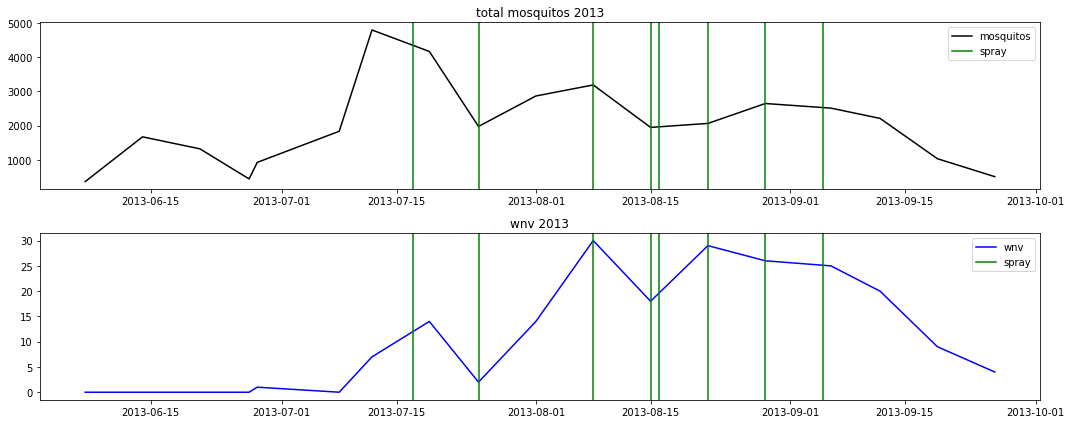

In [450]:
fig, ax = plt.subplots(nrows=2, figsize=(15,6))
ax[0].plot(mosq_2013.index, mosq_2013.values, color='black')
for date in spray_2013:
    ax[0].axvline(x=date, color='green', ls='-')
ax[0].set_title('total mosquitos 2013')
ax[0].legend(['mosquitos','spray'], loc='upper right')


ax[1].plot(wnv_2013.index, wnv_2013.values, color='blue')
for date in spray_2013:
    ax[1].axvline(x=date, color='green', ls='-')
ax[1].set_title('wnv 2013')
ax[1].legend(['wnv','spray'], loc='upper right')


plt.tight_layout()

We observe from 2013 data as well that generally, spray effectiveness seems to decrease after the second spray. This could imply that spraying has some effect in reducing the mosquito population, but it might not be effective in culling mosquito species carrying the west nile virus overall.

#### Total Mosquitos

In [451]:
# Top 10 features correlated to wnvpresent
comb.corr()[['wnvpresent']].abs().sort_values('wnvpresent',ascending=False)[1:11]

,wnvpresent
nummosquitos,0.233532
avgspeed_lag28,0.138465
rel_humid_lag14,0.136085
tavg_lag28,0.131077
rel_humid_lag28,0.126917
rel_humid_lag5,0.111116
species_ord,0.108576
avgspeed_lag14,0.102773
weekofyear,0.100561
tavg_lag14,0.100259


As seen above, the features in our dataset generally have low correlation to `wnvpresent`. The top 10 consists mostly of features that we engineered earlier on, while the strongest feature turns out to be `nummosquitos`, with a Pearson correlation score of 0.23 with our target. However, upon further study of our dataset, the use of this feature in our final model might be quite limited.

The test dataset does not contain the `NumMosquitos` column that we used to create the `nummosquitos` feature in our train data. We explored using the structure of the data (total number of rows for each unique date-species-trap) to estimate the number of mosquitos in the test set, since the observations were capped at 50 mosquitos per row. However, although it may have worked for this particular dataset, we decided that it would not be useful for our model outside of this particular use case. 

In [452]:
# Top 10 features correlated to totalmosquitos
comb.corr()[['nummosquitos']].abs().sort_values('nummosquitos',ascending=False)[1:11]

,nummosquitos
wnvpresent,0.233532
tmin,0.068040
tavg_lag5,0.066488
species_ord,0.066198
cool,0.065672
tavg,0.065043
wetbulb,0.059867
latitude,0.058984
tavg_lag14,0.057675
tmax,0.057313


Additionally, as seen above, all other independent features had very low correlation to `nummosquitos`, and predicting the value of `nummosquitos` using a secondary regression model would just add another layer of randomness that may not be useful to improving our model. Ultimately, due to the reasons above, we decided to drop the feature from our final model.

In [453]:
# Drop nummosquitos column
comb.drop(columns='nummosquitos', inplace=True)

## Cleaning & Engineering Test Data

We will replicate our steps with the test data so that it can be put into our model later on.

In [456]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [458]:
# Convert date to datetime object
test['Date'] = pd.to_datetime(test["Date"], format = "%Y-%m-%d")

# Convert column names to lowercase 
test.columns = [col.lower() for col in test.columns]

# Drop trap column
test.drop(columns='trap', inplace=True)

# Drop other features describing location
test.drop(["address", "block", "street", "addressnumberandstreet", "addressaccuracy"],
              axis = 1,
              inplace = True)

# Map species to ordinal values
test['species_ord'] = test['species'].map(
    {'CULEX PIPIENS/RESTUANS': 2, 'CULEX PIPIENS': 2, 'CULEX RESTUANS': 1})

# 0 for species other than the virus carriers
test['species_ord'].fillna(0, inplace=True)

In [460]:
# Merge with weather
test_comb = pd.merge(test, weather, on='date').drop(columns='species')

# Create week-of-year column
test_comb['weekofyear'] = test_comb.date.dt.isocalendar().week

In [464]:
test_comb.head()

,id,date,latitude,longitude,species_ord,tmax,tmin,tavg,depart,dewpoint,...,rel_humid_lag5,rel_humid_lag14,rel_humid_lag28,avgspeed_lag5,avgspeed_lag14,avgspeed_lag28,preciptotal_lag5,preciptotal_lag14,preciptotal_lag28,weekofyear
0,1,2008-06-11,41.95469,-87.800991,2.0,86,63,75,8,55,...,76.135679,68.797868,50.305293,10.62,9.839286,10.032143,0.31,0.223571,0.1275,24
1,2,2008-06-11,41.95469,-87.800991,1.0,86,63,75,8,55,...,76.135679,68.797868,50.305293,10.62,9.839286,10.032143,0.31,0.223571,0.1275,24
2,3,2008-06-11,41.95469,-87.800991,2.0,86,63,75,8,55,...,76.135679,68.797868,50.305293,10.62,9.839286,10.032143,0.31,0.223571,0.1275,24
3,4,2008-06-11,41.95469,-87.800991,0.0,86,63,75,8,55,...,76.135679,68.797868,50.305293,10.62,9.839286,10.032143,0.31,0.223571,0.1275,24
4,5,2008-06-11,41.95469,-87.800991,0.0,86,63,75,8,55,...,76.135679,68.797868,50.305293,10.62,9.839286,10.032143,0.31,0.223571,0.1275,24


In [465]:
# Export cleaned & engineered train & test datasets
comb.to_csv('../assets/train_combined.csv', index=False)
test_comb.to_csv('../assets/test_combined.csv', index=False)